### Autoimmune disease investigation

The question that we will try to answer in this notebook is how the strength of an autoimmune disease relates to the mean. number of proliferating cells observed in tumor growth.

i have tweaked with the Immune System model, so that i can vary the antigen affinity.

In [1]:
from sys import path
from os import getcwd
print(getcwd())
path.append("/home/soulfex/git_workspace/Tumor_Immune_System_Simulation/Model")
from TumorModel import CellType
from TumorModel import Cell
from TumorModel import Tissue
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

/home/soulfex/git_workspace/Tumor_Immune_System_Simulation/Tests


### Non-malignant case

In [2]:

affinityValues = list(np.linspace(0.8,1,50))
maxNCellsArray = []
automatonWidth = 100
automatonHeight = 100
rAntibody = 0.9

nSteps = 300
thresh = 200

for i in range(0, len(affinityValues)):
    print(i/len(affinityValues)*100)
    print(maxNCellsArray)
    #Initialize the automaton
    tissue = Tissue(automatonWidth, automatonHeight)
    
    centerX = int(automatonWidth/2)
    centerY = int(automatonHeight/2)
    
    tissue.addProliferatingCell(centerX, centerY)
    tissue.addProliferatingCell(centerX + 1, centerY)
    tissue.addProliferatingCell(centerX - 1, centerY)
    tissue.addProliferatingCell(centerX, centerY+1)
    tissue.addProliferatingCell(centerX, centerY-1)
    
    affinity = affinityValues[i]
    
    tissue.immuneSystem.activateImmuneDiseaseWithValues(affinity,rAntibody)
    tissue.evolve(nSteps, False, False, False)    
    maxCells = np.max(tissue.cellCountSeries[:,0])
    maxNCellsArray.append(maxCells)
    
    clear_output(wait = True)  


toDelete = []
toDeleteAffs = []

for i in range(1,len(maxNCellsArray)-1):
    if(np.abs(maxNCellsArray[i] - maxNCellsArray[i-1])>thresh and np.abs(maxNCellsArray[i] - maxNCellsArray[i+1])>thresh):
        toDelete.append(maxNCellsArray[i])
        toDeleteAffs.append(affinityValues[i])

for i in range(0,len(toDelete)):
    maxNCellsArray.remove(toDelete[i])
    affinityValues.remove(toDeleteAffs[i])

    




98.0
[979.0, 948.0, 932.0, 947.0, 64.0, 958.0, 979.0, 36.0, 1021.0, 997.0, 925.0, 959.0, 77.0, 983.0, 987.0, 967.0, 968.0, 935.0, 968.0, 960.0, 64.0, 48.0, 67.0, 961.0, 61.0, 54.0, 964.0, 937.0, 80.0, 52.0, 952.0, 75.0, 938.0, 936.0, 64.0, 56.0, 79.0, 41.0, 68.0, 84.0, 906.0, 28.0, 69.0, 956.0, 36.0, 76.0, 61.0, 79.0, 996.0]


100%|█████████████████████████████████████████| 300/300 [00:56<00:00,  5.28it/s]


Text(0, 0.5, 'Max. proliferating cells')

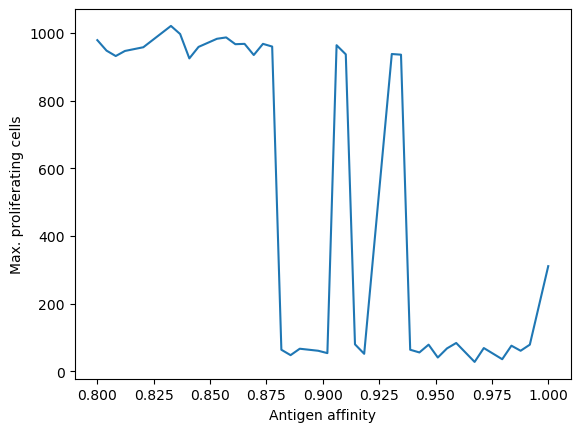

In [3]:
plt.figure()
plt.plot(affinityValues, maxNCellsArray)
plt.xlabel("Antigen affinity")
plt.ylabel("Max. proliferating cells")

### Malignant case

In [ ]:
affinityValues = list(np.linspace(0.8,1,50))
maxNCellsArray = []
automatonWidth = 100
automatonHeight = 100
rAntibody = 0.9

nSteps = 300

for i in range(0, len(affinityValues)):
    print(i/len(affinityValues)*100)
    #Initialize the automaton
    tissue = Tissue(automatonWidth, automatonHeight)
    print(maxNCellsArray)
    
    centerX = int(automatonWidth/2)
    centerY = int(automatonHeight/2)
    
    tissue.addProliferatingCell(centerX, centerY)
    tissue.addProliferatingCell(centerX + 1, centerY)
    tissue.addProliferatingCell(centerX - 1, centerY)
    tissue.addProliferatingCell(centerX, centerY+1)
    tissue.addProliferatingCell(centerX, centerY-1)
    
    affinity = affinityValues[i]
    
    tissue.immuneSystem.activateImmuneDiseaseWithValues(affinity,rAntibody)
    tissue.makeTumorMalignant()
    tissue.evolve(nSteps, False, False, False)    
    maxCells = np.max(tissue.cellCountSeries[:,0])
    maxNCellsArray.append(maxCells)
    
    clear_output(wait = True)

toDelete = []
toDeleteAffs = []

for i in range(1,len(maxNCellsArray)-1):
    if(np.abs(maxNCellsArray[i] - maxNCellsArray[i-1])>thresh and np.abs(maxNCellsArray[i] - maxNCellsArray[i+1])>thresh):
        toDelete.append(maxNCellsArray[i])
        toDeleteAffs.append(affinityValues[i])

for i in range(0,len(toDelete)):
    maxNCellsArray.remove(toDelete[i])
    affinityValues.remove(toDeleteAffs[i])

78.0
[950.0, 963.0, 956.0, 979.0, 951.0, 966.0, 984.0, 968.0, 952.0, 958.0, 974.0, 983.0, 975.0, 948.0, 996.0, 966.0, 961.0, 943.0, 959.0, 959.0, 972.0, 958.0, 958.0, 969.0, 953.0, 942.0, 971.0, 946.0, 930.0, 957.0, 942.0, 925.0, 961.0, 944.0, 958.0, 928.0, 947.0, 970.0, 946.0]


 83%|██████████████████████████████████▏      | 250/300 [01:23<00:24,  2.08it/s]

In [ ]:
plt.figure()
plt.plot(affinityValues, maxNCellsArray)
plt.xlabel("Antigen affinity")
plt.ylabel("Max. proliferating cells")